## Importing All Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from datetime import datetime
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
warnings.filterwarnings('ignore')
%matplotlib inline

## Importing Dataset i.e. Nabil Bank (nabil) Stock Price Dataset

In [2]:
df = pd.read_csv('/content/drive/MyDrive/MSc. Dissertation/Dataset/nabil.csv')

In [3]:
df.head()

,Date,Open,High,Low,Ltp,% Change,Qty,Turnover
0,3/20/2011,"1,200.00","1,190.00","1,160.00","1,170.00",0.0,853,"1,000,811.00"
1,3/24/2011,"1,162.00","1,178.00","1,150.00","1,153.00",0.0,356,"412,649.00"
2,3/25/2011,"1,153.00","1,174.00","1,145.00","1,174.00",0.0,702,"807,507.00"
3,3/27/2011,"1,174.00","1,160.00","1,120.00","1,147.00",0.0,"1,426.00","1,619,270.00"
4,3/28/2011,"1,147.00","1,150.00","1,110.00","1,132.00",0.0,352,"393,534.00"


In [4]:
df.tail()

,Date,Open,High,Low,Ltp,% Change,Qty,Turnover
3078,9/18/2024,562,565,550,556,-0.93,"68,886.00","38,431,118.40"
3079,9/22/2024,556,578,556,562,1.08,"55,026.00","31,054,968.70"
3080,9/23/2024,573.2,573.2,555,568,1.07,"123,568.00","69,577,465.00"
3081,9/24/2024,567,567,552.1,553.5,-2.55,"66,337.00","36,962,336.00"
3082,9/25/2024,550,560,545.1,555,0.27,"50,441.00","27,867,328.70"


In [5]:
df.duplicated().sum()

1

## Copying the dataset for future use

In [6]:
df1 = df.copy()
df1.reset_index(inplace=True)

In [7]:
df.reset_index(drop=True, inplace=True)

### Renaming and Dropping unwanted column

In [8]:
df.drop(['% Change', 'Turnover'], axis=1, inplace=True)
df = df.rename(columns = {
    'Ltp': 'Close',
    'Qty': 'Volume'
})

In [9]:
df.head()

,Date,Open,High,Low,Close,Volume
0,3/20/2011,"1,200.00","1,190.00","1,160.00","1,170.00",853
1,3/24/2011,"1,162.00","1,178.00","1,150.00","1,153.00",356
2,3/25/2011,"1,153.00","1,174.00","1,145.00","1,174.00",702
3,3/27/2011,"1,174.00","1,160.00","1,120.00","1,147.00","1,426.00"
4,3/28/2011,"1,147.00","1,150.00","1,110.00","1,132.00",352


In [10]:
df['Date'] = pd.to_datetime(df['Date'])
df['Open'] = df['Open'].str.replace(',', '').astype(float)
df['High'] = df['High'].str.replace(',', '').astype(float)
df['Low'] = df['Low'].str.replace(',', '').astype(float)
df['Close'] = df['Close'].str.replace(',', '').astype(float)
df['Volume'] = df['Volume'].str.replace(',', '').astype(float).astype(int)

### Splitting into features and target

In [11]:
X = df.drop(['Close', 'Date'], axis=1)
y = df['Close']

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

### Splitting the data into train and test set

In [13]:
X_train, X_test, y_train, y_test = X[:round(X.shape[0]*0.8)], X[round(X.shape[0]*0.8):], y[:round(y.shape[0]*0.8)], y[round(y.shape[0]*0.8):]

### Model Building using Linear Regression

In [14]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [15]:
lr.score(X_train, y_train)

0.9992236714925169

In [16]:
predicted = lr.predict(X_test)
predicted

array([1101.46007394, 1095.51397921, 1078.34605419, 1070.5882599 ,
       1073.13891742, 1080.79232485, 1082.76435351, 1058.18478441,
       1066.85177291, 1072.61257713, 1073.51064721, 1054.95340059,
       1043.63893058, 1047.71866953, 1022.12024473, 1007.17618883,
       1004.51767838, 1011.39456247, 1007.68195682, 1063.12233847,
       1089.31145141, 1085.2042036 , 1074.83959225, 1065.92345121,
       1058.5736017 , 1055.82131953, 1049.92794685, 1044.70270793,
       1033.78935638, 1017.75284094, 1018.79769136,  998.2099656 ,
       1008.41240017, 1000.73603785,  996.83308134,  987.76542359,
        975.34393127,  969.55771333,  982.78394057,  971.87843159,
        961.34371542,  980.43738411,  964.89460554,  947.64323739,
        941.71145562,  932.08054733,  940.98051177,  958.44672201,
        941.6653346 ,  936.64884222,  937.94053599,  925.36168637,
        911.38025921,  906.73775778,  895.10166801,  900.19461683,
        902.99080534,  929.68440108,  938.61140629,  921.17498

In [17]:
prediction = pd.DataFrame({'Date': df.Date[round(df.shape[0]*0.8):], 'Actual': y_test, 'Predicted': predicted})
prediction.set_index('Date', inplace=True)
prediction

,Actual,Predicted
Date,,
2022-02-09,1100.9,1101.460074
2022-02-10,1097.1,1095.513979
2022-02-13,1070.0,1078.346054
2022-02-14,1064.0,1070.588260
2022-02-15,1075.0,1073.138917
...,...,...
2024-09-18,556.0,556.618648
2024-09-22,562.0,570.345543
2024-09-23,568.0,560.807337


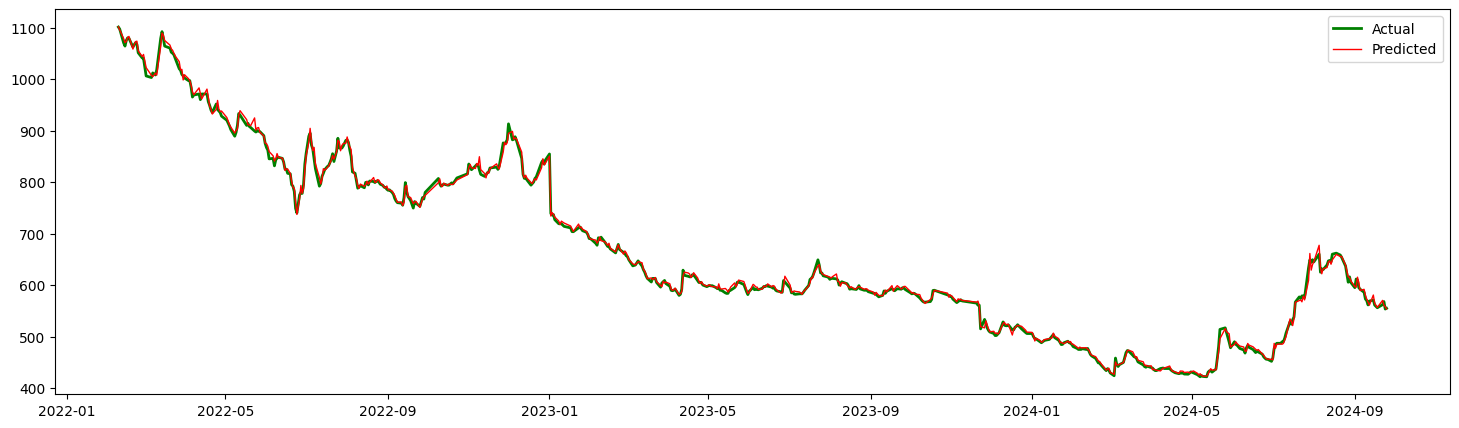

In [18]:
plt.figure(figsize=(18, 5))
plt.plot(prediction.Actual, label='Actual', color='g', linewidth=2)
plt.plot(prediction.Predicted, label='Predicted', color='r', linewidth=1)
plt.legend()
plt.show()


In [19]:
lr.predict(scaler.transform([[580.00, 583.00, 569.00, 215581.00]]))

array([570.52516467])

## Calculating the Performance Evaluation Metrics

In [20]:
mse = mean_squared_error(y_test, predicted)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predicted)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', mae)

Mean Squared Error: 32.131172011744844
Root Mean Squared Error: 5.668436469763496
Mean Absolute Error: 4.170068371994397
